In [9]:
import matplotlib.pyplot as plt
import numpy as np
import _results

plt.style.use('seaborn-talk')
plt.style.use('ggplot')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

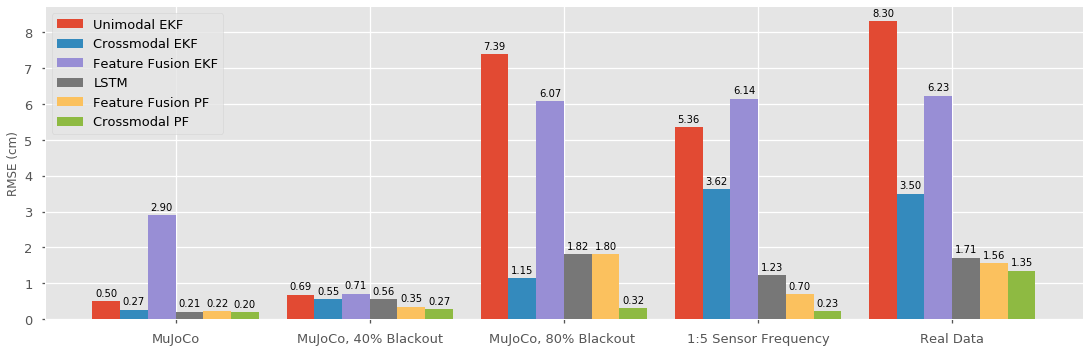

In [10]:
# Order is:
# 0%, 40%, 80%, seq5, omnipush 
results = {
    "Unimodal EKF": _results.ekf_sigma,
    "Crossmodal EKF": _results.ekf_weighted,
    "Feature Fusion EKF": _results.ekf_late,
    "Crossmodal EKF": _results.ekf_weighted,
    "LSTM": _results.lstm,
    "Feature Fusion PF": _results.dpf_late,
    "Crossmodal PF": _results.dpf_weighted,
}

labels = ['MuJoCo', 'MuJoCo, 40% Blackout', 'MuJoCo, 80% Blackout ', '1:5 Sensor Frequency', 'Real Data']

fig, ax = plt.subplots(figsize=(15, 5))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# print(x)

x = np.arange(len(labels))  # the label locations
width = 1.0 / 7.0  # the width of the bars

rects = []

for i, (label, result) in enumerate(results.items()):
#     values = tuple(result[:3]) + tuple(result[4:])
    values = result
    rects.append(ax.bar(x + i * width - (5 * width) / 2, values, width, label=label))

for r in rects:
    autolabel(r)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.ylabel("RMSE (cm)")
plt.savefig("error_bargraph.pdf") 